In [1]:
#for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

2024-04-17 13:05:28.713434: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 13:05:30.109411: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 13:05:33.834076: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 13:05:37.624239: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
folder_path = '/workspaces/Introduction-to-Artificial-Intelligence-and-Machine-Learning/ca3/flower_images'  # Replace with your actual folder path
images = []

model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Add or modify to suit your image file types
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=(224,224))
        img = np.array(img)
        img = img.reshape(1,224,224,3)
        images.append(img)

# Now 'images' is a list of PIL Image objects

2024-04-17 13:05:48.961189: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-17 13:05:49.617367: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-17 13:05:49.854824: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-17 13:05:50.167344: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-04-17 13:05:50.248935: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


: 

In [ ]:
images = np.concatenate(images, axis=0)
features = model.predict(images)

2024-04-17 12:50:58.836417: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step


In [ ]:
features.shape

(210, 4096)

In [ ]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('/workspaces/Introduction-to-Artificial-Intelligence-and-Machine-Learning/ca3/flower_images/flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(features)
x = pca.transform(features)

# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

KMeans(n_clusters=10, random_state=22)

In [ ]:
groups = {}
for file, cluster in zip([i for i in os.listdir(folder_path) if i.endswith(".png")], kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1)
        img = load_img('/workspaces/Introduction-to-Artificial-Intelligence-and-Machine-Learning/ca3/flower_images/' + file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
groups[1]

['0193.png',
 '0125.png',
 '0009.png',
 '0157.png',
 '0177.png',
 '0095.png',
 '0016.png',
 '0074.png',
 '0045.png',
 '0163.png',
 '0062.png',
 '0042.png',
 '0201.png',
 '0188.png',
 '0081.png']

In [ ]:
for i in [0,1]:
    view_cluster(i)

Text(0, 0.5, 'Sum of squared distance')

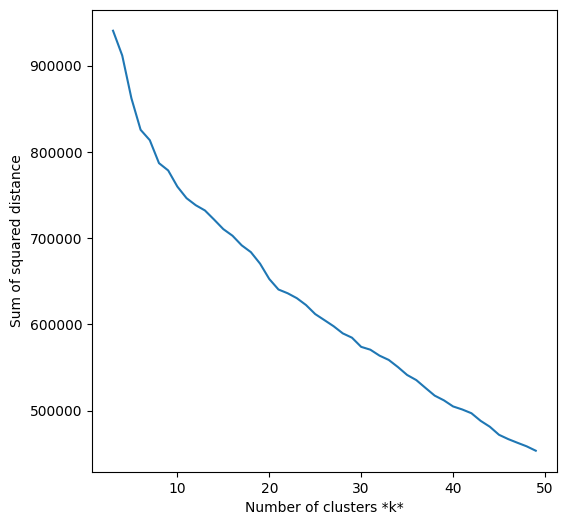

In [ ]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')